In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from plot_settings import global_setting
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
global_setting()

In [2]:
model_names = ['FlatVel-A', 'FlatVel-B',
              'CurveVel-A', 'CurveVel-B',
              'FlatFault-A', 'FlatFault-B',
              'CurveFault-A', 'CurveFault-B']

metrics = ["MSE", "MAE", "SSIM"]


In [3]:
results_dict = {}
for metric in metrics:
    results_dict[metric] = pd.DataFrame(columns=["Dataset", "Metric"])
    results_dict[metric]["Dataset"] = model_names
    results_dict[metric]["Metric"] = metric


In [4]:
results_dict["MSE"]

,Dataset,Metric
0,FlatVel-A,MSE
1,FlatVel-B,MSE
2,CurveVel-A,MSE
3,CurveVel-B,MSE
4,FlatFault-A,MSE
5,FlatFault-B,MSE
6,CurveFault-A,MSE
7,CurveFault-B,MSE


In [5]:
model_dict = {"Skip Latent U-Net (Small)" : "UNetInverseModel_17M",
              "No Skip Latent U-Net (Small)" : "UNetInverseModel_17M_NoSkip",
              "Skip Latent U-Net (Large)" : "UNetInverseModel_33M",
              "No Skip Latent U-Net (Large)" : "UNetInverseModel_33M_NoSkip",
             }

color_dict = {
          'No Skip Latent U-Net (Large)':"steelblue", 
          'Skip Latent U-Net (Large)':"deepskyblue",
          'No Skip Latent U-Net (Small)':"forestgreen",
          'Skip Latent U-Net (Small)':"limegreen",
         }

basepath = "../Metrics_final/"
prefix = "eval_metric"
mode = "Velocity"

sheets = ["Velocity_unnorm_MAE", "Velocity_unnorm_MSE", "Velocity_SSIM"]

In [6]:
for key, value in model_dict.items():
    grid_file = os.path.join(basepath, prefix+value+".xlsx")
    model_name = key
    for metric in sheets:
        metric_type = metric.split("_")[-1]
        #read the particular metric sheet in the result grid file (dataset vs dataset)
        df = pd.read_excel(grid_file, engine='openpyxl', header=0, index_col=0, sheet_name=metric)
#         print(df)
        metric_diag = [df[dataset.lower()][dataset] for dataset in model_names]
        results_dict[metric_type][model_name] = metric_diag

In [7]:
mapping = {
    'FlatVel-A': 'FVA',
    'FlatVel-B': 'FVB',
    'CurveVel-A': 'CVA',
    'CurveVel-B': 'CVB',
    'FlatFault-A': 'FFA',
    'FlatFault-B': 'FFB',
    'CurveFault-A': 'CFA',
    'CurveFault-B': 'CFB'
}

In [8]:
save_dir = "../PaperFigures/"

<Figure size 1200x800 with 0 Axes>

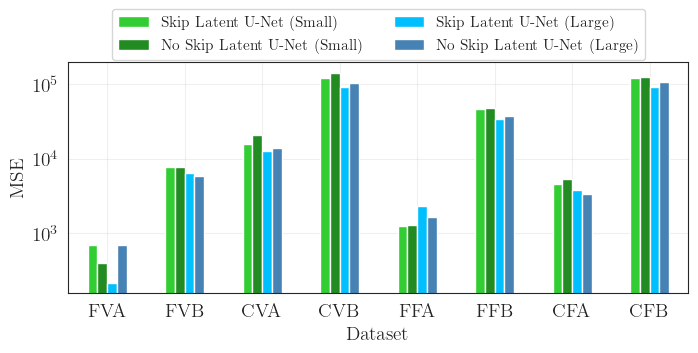

In [9]:
metrics = "MSE"


# Replace the dataset names with shorthand notations
results_ = results_dict[metrics]
results_['Dataset'] = results_['Dataset'].replace(mapping)

arch_names = list(model_dict.keys())
color_list = [color_dict[arch_name] for arch_name in arch_names]

plt.figure()
ax = results_.plot(x="Dataset",
                   y=arch_names, 
                   kind="bar",
                   figsize=(8, 3), 
                   rot=0, 
                   fontsize=14, 
                   color=color_list)

ax.set_ylabel(f"{metrics}", fontsize=14)
ax.set_xlabel("Dataset", fontsize=14)

plt.yscale("log")
plt.xticks(rotation=0)
plt.legend(loc="center", ncol=2, fontsize=11, bbox_to_anchor=[0.5, 1.12])


# # Create dataset legend elements
# dataset_handles, dataset_labels = plt.gca().get_legend_handles_labels()


# legend_elements = [
#     Patch(facecolor="blue", edgecolor="blue", label="Latent U-Net (Large)",linewidth=0.5),
#     Patch(facecolor="green", edgecolor="green", label="Latent U-Net (Small)",linewidth=0.5)
# ]


# # Combine both legends
# combined_handles = dataset_handles + legend_elements
# combined_labels = dataset_labels + [element.get_label() for element in legend_elements]

# # Create a single combined legend
# plt.legend(combined_handles, combined_labels, loc="center", ncol=3, fontsize=11, bbox_to_anchor=[0.5, 1.12])

plt.grid("on", alpha=0.3)
plt.savefig(save_dir+f"skip_vs_noskip_unet_{metrics}.png", dpi=150, bbox_inches="tight")
# plt.show()

<Figure size 1200x800 with 0 Axes>

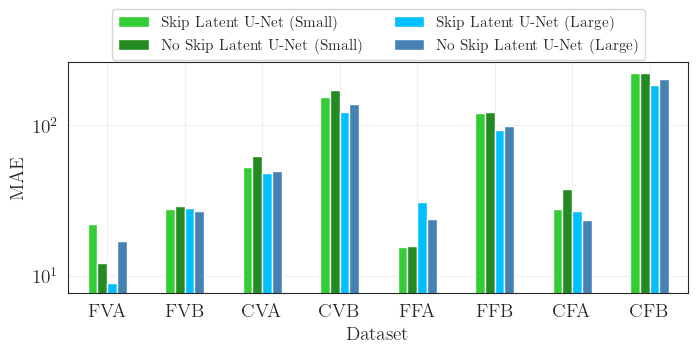

In [10]:
metrics = "MAE"


# Replace the dataset names with shorthand notations
results_ = results_dict[metrics]
results_['Dataset'] = results_['Dataset'].replace(mapping)

arch_names = list(model_dict.keys())
color_list = [color_dict[arch_name] for arch_name in arch_names]

plt.figure()
ax = results_.plot(x="Dataset",
                   y=arch_names, 
                   kind="bar",
                   figsize=(8, 3), 
                   rot=0, 
                   fontsize=14, 
                   color=color_list)

ax.set_ylabel(f"{metrics}", fontsize=14)
ax.set_xlabel("Dataset", fontsize=14)

plt.yscale("log")
plt.xticks(rotation=0)
plt.legend(loc="center", ncol=2, fontsize=11, bbox_to_anchor=[0.5, 1.12])
plt.grid("on", alpha=0.3)
plt.savefig(save_dir+f"skip_vs_noskip_unet_{metrics}.png", dpi=150, bbox_inches="tight")
# plt.show()

In [ ]:
metrics = "SSIM"


# Replace the dataset names with shorthand notations
results_ = results_dict[metrics]
results_['Dataset'] = results_['Dataset'].replace(mapping)

arch_names = list(model_dict.keys())
color_list = [color_dict[arch_name] for arch_name in arch_names]

plt.figure()
ax = results_.plot(x="Dataset",
                   y=arch_names, 
                   kind="bar",
                   figsize=(8, 3), 
                   rot=0, 
                   fontsize=14, 
                   color=color_list)

ax.set_ylabel(f"{metrics}", fontsize=14)
ax.set_xlabel("Dataset", fontsize=14)

plt.xticks(rotation=0)
plt.legend(loc="center", ncol=2, fontsize=11, bbox_to_anchor=[0.5, 1.12])
plt.grid("on", alpha=0.3)
plt.savefig(save_dir+f"skip_vs_noskip_unet_{metrics}.png", dpi=150, bbox_inches="tight")
# plt.show()

<Figure size 1200x800 with 0 Axes>